## Import Library

In [56]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## Load dataset

In [57]:
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing 1

In [59]:
telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]

In [60]:
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

In [61]:
#Hapus kolom customer ID
telco.drop('customerID', axis=1,inplace= True)

### Label Encoding

In [62]:
#untuk kolom gender
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

telco['gender'] = labelencoder.fit_transform(telco['gender'])

In [63]:
telco.replace(['Yes', 'No'], [1,0], inplace= True)

In [64]:
telco.replace(['No phone service', 'No internet service'], 2, inplace= True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

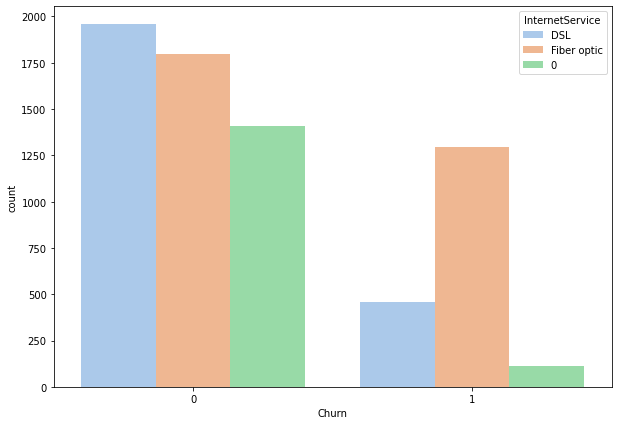

In [65]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=telco,
            x='Churn',
            hue='InternetService',
            palette= 'pastel')

### Freequency Encoding

In [66]:
fre = telco.groupby('InternetService').size()/len(telco)
telco['InternetService'] = telco['InternetService'].map(fre)

In [67]:
fre1 = telco.groupby('Contract').size()/len(telco)
telco['Contract'] = telco['Contract'].map(fre1)

In [68]:
fre2 = telco.groupby('PaymentMethod').size()/len(telco)
telco['PaymentMethod'] = telco['PaymentMethod'].map(fre2)

### Check Imbalance Data

In [69]:
#Check balance data

target = telco['Churn'].value_counts().reset_index()
target.rename(columns={'index':'Churn','Churn':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Churn,freq,percentage
0,0,5163,73.42
1,1,1869,26.58


# BASELINE

In [70]:
X = telco.drop('Churn', axis=1)
y = telco['Churn']

In [71]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [73]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [74]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))
print('AUC ',roc_auc_score(y_test, y_pred_reg))
print('F1 Score ',f1_score(y_test, y_pred_reg))

Akurasi 0.7933649289099526
AUC  0.7086177155291954
F1 Score  0.5758754863813228


### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))
print('AUC ',roc_auc_score(y_test, y_pred_dt))
print('F1 Score ',f1_score(y_test, y_pred_dt))

Akurasi 0.7232227488151659
AUC  0.6557286686022493
F1 Score  0.49568221070811747


#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [81]:
print('Akurasi',accuracy_score(y_test, y_pred_rf))
print('AUC ',roc_auc_score(y_test, y_pred_rf))
print('F1 Score ',f1_score(y_test, y_pred_rf))

Akurasi 0.7843601895734598
AUC  0.6859989021725247
F1 Score  0.5399393326592518


# Data preprocessing 2

In [82]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   float64
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   float64
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   float64


### Missing Value

In [83]:
telco.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Duplicate Data

In [84]:
telco.duplicated().sum()

22

In [85]:
telco.drop_duplicates(keep='first', inplace= True)

### Outlier

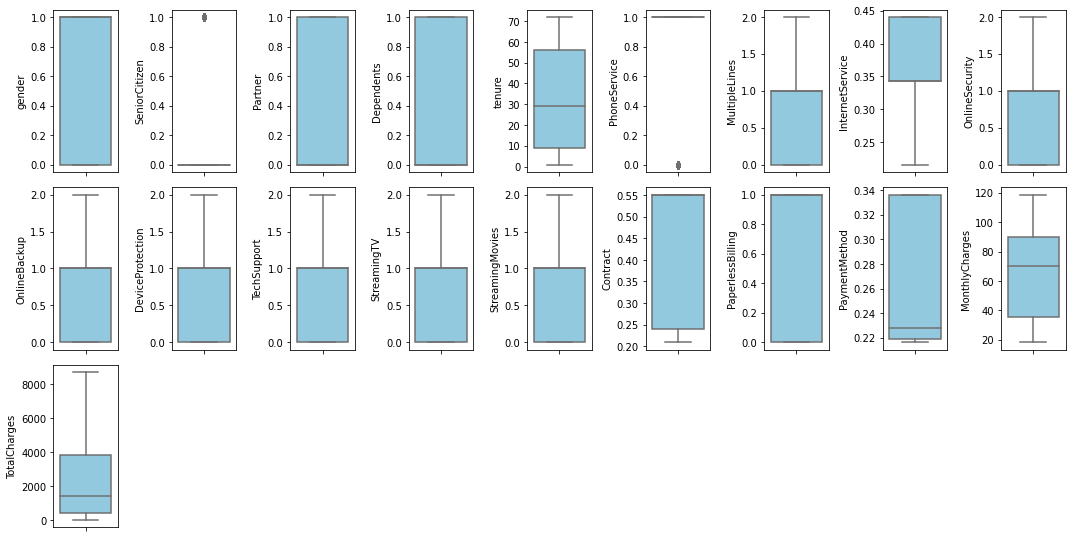

In [86]:
features  = list(telco)[:-1]
features

plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(4, len(features)//2, i+1)
    sns.boxplot(y=features[i],data=telco,color='skyblue')
    plt.tight_layout()

Tidak ada outlier pada kolom non-binary value : tenure, monthlycharges, totalcharges,paymentmethod, sehingga tidak perlu untuk dihandle

### Multicollinearity

Multicollinearity mungkin tidak ada berdampak lebih terhadap prediction performance pada klasifikasi, tetapi dapat kita gunakan untuk tracing feature

In [87]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df.sort_values(by=['vif_score'], ascending=False)

,feature,vif_score
8,InternetService,23.198034
18,MonthlyCharges,22.551726
19,TotalCharges,10.380805
5,tenure,6.653013
12,TechSupport,4.367483
9,OnlineSecurity,4.068054
14,StreamingMovies,3.900377
13,StreamingTV,3.874264
11,DeviceProtection,3.701531
6,PhoneService,3.473298


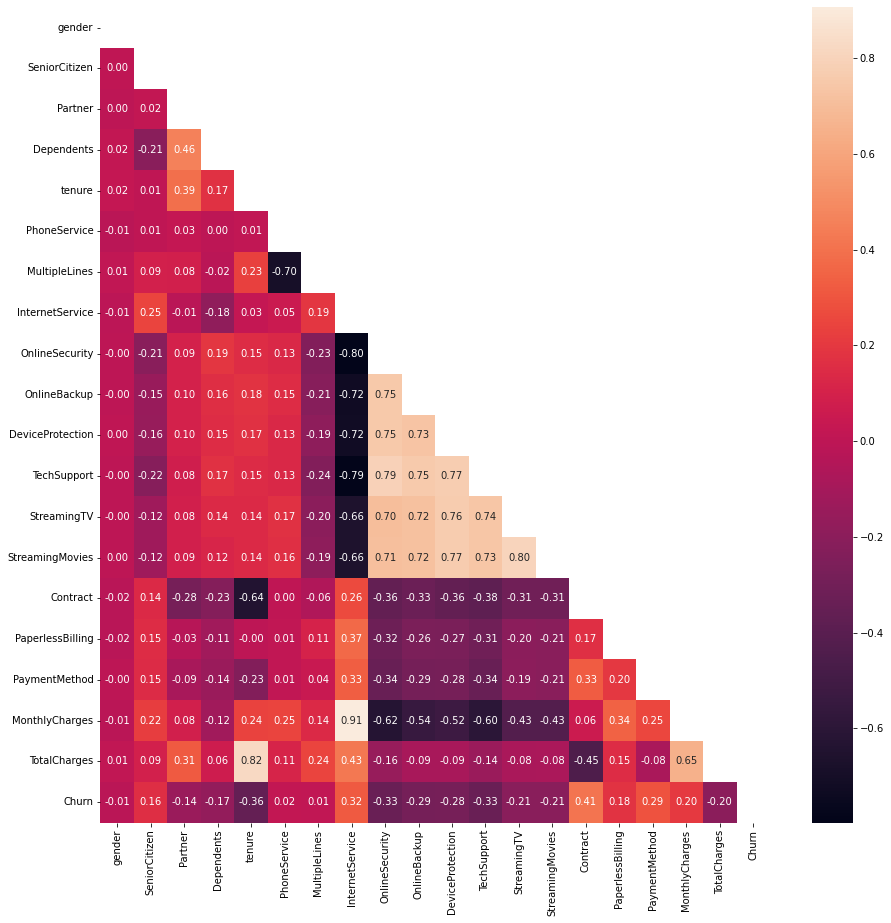

In [88]:
# heatmap correlation
telco_train = pd.concat([X_train, y_train], axis=1)
corr = telco_train.corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.show()

# Drop Feature

### Feature yang memiliki korelasi rendah dengan target
< abs(0.2)

In [89]:
X_train = X_train.drop(columns= ['gender', 'MultipleLines', 'PhoneService', 
                        'Partner', 'Dependents', 'SeniorCitizen', 'PaperlessBilling'])

In [90]:
X_test = X_test.drop(columns= ['gender', 'MultipleLines', 'PhoneService', 
                        'Partner', 'Dependents', 'SeniorCitizen', 'PaperlessBilling'])

### Feature yang memiliki multicollinearity yang cukup besar

In [91]:
X_train = X_train.drop(columns= ['MonthlyCharges', 'StreamingMovies', 'StreamingTV', 
                            'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity'])

In [92]:
X_test = X_test.drop(columns= ['MonthlyCharges', 'StreamingMovies', 'StreamingTV', 
                            'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity'])

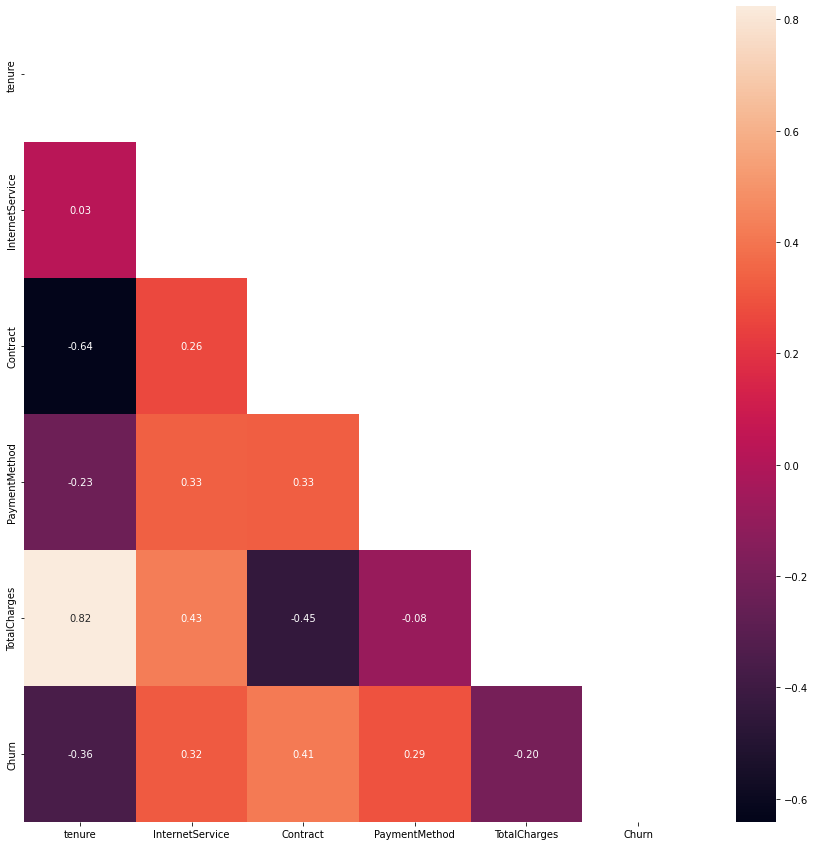

In [93]:
# heatmap correlation
telco_train = pd.concat([X_train, y_train], axis=1)
corr = telco_train.corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.show()

Terdapat collinearity yang lebih dari 0.8 (TotalCharges dan InternetService) yang tinggi tetapi tidak saya drop

## Modeling  & Evaluation

## Logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [95]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [96]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))
print('AUC ',roc_auc_score(y_test, y_pred_reg))
print('F1 Score ',f1_score(y_test, y_pred_reg))

Akurasi 0.7644549763033175
AUC  0.665051571423804
F1 Score  0.5054726368159205


## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))
print('AUC ',roc_auc_score(y_test, y_pred_dt))
print('F1 Score ',f1_score(y_test, y_pred_dt))

Akurasi 0.7194312796208531
AUC  0.6360920564011742
F1 Score  0.46473779385171793


## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [106]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
print('Akurasi',accuracy_score(y_test, y_pred_rf))
print('AUC ',roc_auc_score(y_test, y_pred_rf))
print('F1 Score ',f1_score(y_test, y_pred_rf))

Akurasi 0.7436018957345971
AUC  0.6463010463883893
F1 Score  0.4762826718296225


# BALANCING DATA

In [116]:
telco.shape

(7010, 20)

In [118]:
telco_balanced = telco[['tenure', 'InternetService','Contract', 
                'PaymentMethod', 'TotalCharges','Churn']]

In [119]:
telco_balanced.shape

(7010, 6)

In [120]:
from imblearn import under_sampling, over_sampling

sm = over_sampling.SMOTE(random_state=42)

X = telco_balanced.drop(['Churn'],axis = 1)
Y = telco_balanced['Churn']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7010, 5)
Shape of X after SMOTE: (10306, 5)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

### Logistic Regression balanced data

In [122]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [123]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))
print('AUC ',roc_auc_score(y_test, y_pred_reg))
print('F1 Score ',f1_score(y_test, y_pred_reg))

Akurasi 0.7600258732212161
AUC  0.7612030924707335
F1 Score  0.7770432692307692


### Decision Tree balanced data

In [125]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [126]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [127]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))
print('AUC ',roc_auc_score(y_test, y_pred_dt))
print('F1 Score ',f1_score(y_test, y_pred_dt))

Akurasi 0.8078913324708926
AUC  0.8078031531484408
F1 Score  0.8044766293614221


### Random Forest balanced data

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [129]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [130]:
print('Akurasi',accuracy_score(y_test, y_pred_rf))
print('AUC ',roc_auc_score(y_test, y_pred_rf))
print('F1 Score ',f1_score(y_test, y_pred_rf))

Akurasi 0.8324708926261319
AUC  0.8322114931946814
F1 Score  0.8272181454302869


# Summary

1. Model terbaik diantara : Linier regression, Decision tree, Random Forest
yang di uji coba pada data ini adalah `Random Forest (balanced data)` dengan akurasi 0.83%
sedangkan Decision tree akurasinya 0.87% dan Linier Regression dengan akurasi 0.76%, hal ini terjadi karena terdapat korelasi yang tinggi antara feature TotalCharges dan Tenure yang tetap saya pertahankan. Sedangkan model liniear seperti Linier regression cukup sensitive dengan collinearity dan non-liniear model seperti decision tree atau random forest
2. perbandingan evaluation matrix antara menggunakan data balance dan tidak sangat berpengaruh. dalam hal ini saya bandingkan pada nilai F1-score atau AUC nya karena untuk data inbalanced tidak tepat menggunakan akurasi sebagai evaluasi